## Chapter 10. 케라스를 사용한 인공 신경망 소개

#### 10.1 생물학적 뉴런에서 인공 뉴런까지

#### 퍼셉트론

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import warnings; warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa)인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

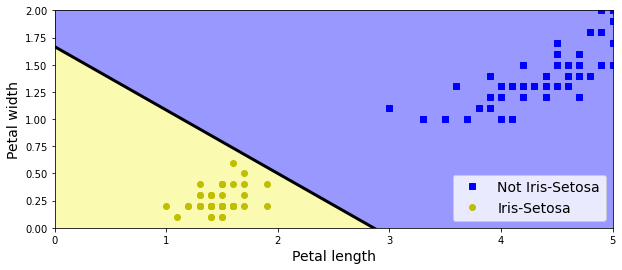

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

#### 10.2 케라스로 다층 퍼셉트론 구현하기

In [4]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

In [5]:
# tf.keras 에서 구현된 케라스 API 버젼 -tf 접미사는 tf.keras가 텐서플로 특화된 기능이 추가되어 케라스 API를 구현했다는 것을 나타냄
keras.__version__

'2.8.0'

In [6]:
# 케라스를 사용해 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

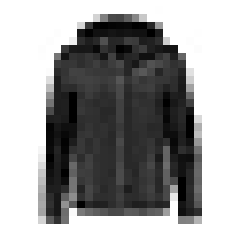

In [10]:
# matplotlib.pyplot 의 imshow() 함수와 'binary' 컬러맵을 사용해 이미지 출력  가능
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# 0~9 까지 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
# 첫 이미지는 코트
class_names[y_train[0]]

'Coat'

#### 시퀀셜 API를 사용해 모델 만들기

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
model.layers

In [19]:
hidden_1 = model.layers[1]
hidden_1.name

'dense_3'

In [20]:
model.get_layer('dense_3') is hidden_1

True

In [21]:
weights, biases = hidden_1.get_weights()
weights

array([[-0.02407625,  0.06356694, -0.07376695, ..., -0.05705667,
         0.00855181, -0.04358877],
       [-0.06683131,  0.06128459,  0.07407245, ...,  0.01143038,
        -0.02551024, -0.00497071],
       [ 0.02621759,  0.06059597, -0.00212955, ..., -0.06601863,
         0.00325541, -0.07409162],
       ...,
       [ 0.01414423, -0.01334389, -0.06226343, ..., -0.06191763,
        -0.06247366,  0.04291108],
       [ 0.02377516,  0.05648577, -0.00143528, ..., -0.06522588,
         0.00655103, -0.0484184 ],
       [ 0.03861325, -0.06282939,  0.04441569, ..., -0.0177195 ,
         0.04031983, -0.01741731]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

#### 모델 컴파일

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'sgd',
            metrics = ['accuracy'])

#### 모델 훈련과 평가

In [26]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7145 - accuracy: 0.7661 - val_loss: 0.5047 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4847 - accuracy: 0.8316 - val_loss: 0.4493 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4409 - accuracy: 0.8449 - val_loss: 0.4092 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4143 - accuracy: 0.8543 - val_loss: 0.3964 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3933 - accuracy: 0.8620 - val_loss: 0.3804 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3786 - accuracy: 0.8664 - val_loss: 0.3731 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3650 - accuracy: 0.8706 - val_loss: 0.3581 - val_accuracy:

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

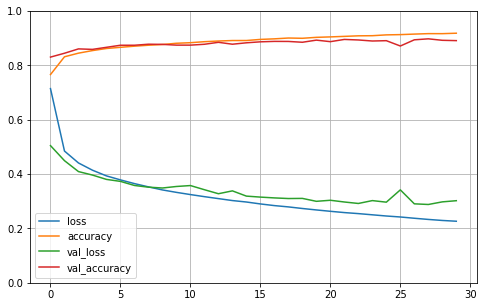

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축 범위를 [0-1] 사이로 설정
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8815


[0.33857354521751404, 0.8815000057220459]

#### 모델을 사용해 예측을 만들기

In [32]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
# 모델이 예측한 정답
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
# 실제 정답
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### 시퀀셜 API를 사용해 회귀용 다층 퍼셉트론 만들기

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # 새로운 샘플
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7665 - val_loss: 0.5205
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5042 - val_loss: 0.4784
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4844 - val_loss: 0.4658
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4566 - val_loss: 0.4479
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4442 - val_loss: 0.4317
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4442 - val_loss: 0.4265
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4284 - val_loss: 0.4191
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4217 - val_loss: 0.4109
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4299 - val_loss: 0.4123
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4179 - val_loss: 0.4017

#### 함수형 API를 사용해 복잡한 모델 만들기

In [38]:
# 함수형 API

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

# Sequential API

# model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation='relu'),
#    keras.layers.Dense(100, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
# ])

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                            

In [39]:
# 다중 입력 다루기

# 특성 0에서 4까지 5개의 특성을 와이드 경로에 보내고
# 특성 2에서 7까지 6개의 특성을 딥 경로로 전달, 3개의 특성 (특성 2, 3, 4)는 양쪽에 모두 전달 됨
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [42]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.7569 - val_loss: 0.8120
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7353 - val_loss: 0.6940
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6676 - val_loss: 0.6514
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6343 - val_loss: 0.6280
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6109 - val_loss: 0.6042
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5923 - val_loss: 0.5929
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5770 - val_loss: 0.5759
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5643 - val_loss: 0.5649
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5539 - val_loss: 0.5545
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5452 - val_loss: 0.5451

In [44]:
# 규제를 위한 보조 출력 추가하기

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [45]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [46]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 3.0878 - main_output_loss: 2.6525 - aux_output_loss: 7.0059 - val_loss: 1.6109 - val_main_output_loss: 1.1428 - val_aux_output_loss: 5.8239
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.3259 - main_output_loss: 0.9361 - aux_output_loss: 4.8344 - val_loss: 1.0585 - val_main_output_loss: 0.7610 - val_aux_output_loss: 3.7360
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9624 - main_output_loss: 0.7137 - aux_output_loss: 3.2011 - val_loss: 0.8589 - val_main_output_loss: 0.6741 - val_aux_output_loss: 2.5223
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8132 - main_output_loss: 0.6527 - aux_output_loss: 2.2577 - val_loss: 0.7591 - val_main_output_loss: 0.6367 - val_aux_output_loss: 1.8604
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7334 - main_output_loss: 0.6205 - aux_output_loss: 1.7500 - val_loss

In [47]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.5388 - main_output_loss: 0.4837 - aux_output_loss: 1.0354


#### 서브클래싱 API로 동적 모델 만들기

In [52]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수를 처리함 (예를 들어, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [53]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.8390 - output_1_loss: 2.6092 - output_2_loss: 4.9076 - val_loss: 1.2970 - val_output_1_loss: 1.0529 - val_output_2_loss: 3.4943
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.0892 - output_1_loss: 0.8914 - output_2_loss: 2.8702 - val_loss: 0.8982 - val_output_1_loss: 0.7603 - val_output_2_loss: 2.1391
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8396 - output_1_loss: 0.7150 - output_2_loss: 1.9604 - val_loss: 0.7716 - val_output_1_loss: 0.6713 - val_output_2_loss: 1.6735
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7496 - output_1_loss: 0.6521 - output_2_loss: 1.6269 - val_loss: 0.7145 - val_output_1_loss: 0.6279 - val_output_2_loss: 1.4942
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7010 - output_1_loss: 0.6141 - output_2_loss: 1.4834 - val_loss: 0.6744 - val_output_1_loss: 0.5935 - val_ou

#### 저장과 복원

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1063 - val_loss: 0.8963
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7258 - val_loss: 0.6427
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6184 - val_loss: 0.5937
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5771 - val_loss: 0.5607
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5465 - val_loss: 0.5341
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5226 - val_loss: 0.5140
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.5028
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4911 - val_loss: 0.4886
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4809
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4709


In [60]:
model.save("./keras/my_keras_model.h5")
model = keras.models.load_model("./keras/my_keras_model.h5")

In [61]:
model.predict(X_new)

array([[2.2454302],
       [2.0061052],
       [2.8471577]], dtype=float32)

In [62]:
model.save_weights("./keras/my_keras_weights.ckpt")
model.load_weights("./keras/my_keras_weights.ckpt")